# Model Optimization- Ada Boost

Lets first see what parameters could possibly be tuned

In [1]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
params = clf.get_params()
print("There are %d parameters for the Logistic Model.  The Default values are:" %len(params.keys()))
for key in params.keys():
    print("%25s:   %s" %(key,params[key]))

There are 5 parameters for the Logistic Model.  The Default values are:
                algorithm:   SAMME.R
           base_estimator:   None
            learning_rate:   1.0
             n_estimators:   50
             random_state:   None


In [2]:
# get the data 
import ml_utils as mu

with mu.HiddenPrints():
    X, y , Xh, yh, Xv, yv = mu.get_training_holdout_validation_data()

[2018-07-12 01:50:25.487816] Starting tuning classifier__n_estimators
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   16.8s finished


Best parameters set found on development set:

{'classifier__n_estimators': 141}


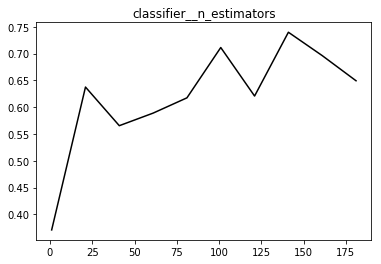

[2018-07-12 01:50:44.004628] Done with tuning classifier__n_estimators (Took 0.300 minutes)


In [7]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import AdaBoostClassifier

import numpy as np

# parameters and ranges to plot
param_grid = {
    "classifier__n_estimators": range(1,201,20),
    "classifier__learning_rate": np.logspace(-4, -1, 30)
}

clf = Pipeline([
    ('standardization', StandardScaler()),
    ('oversampler', RandomOverSampler()),
    ('classifier', AdaBoostClassifier(random_state = 84))
])

for parameter, param_range in dict.items(param_grid):
    with mu.Timer("tuning %s" %parameter) as timer:
        mu.unidirectional_grid_search_optimization(clf, parameter, param_range, X, y)